In [1]:
import pandas as pd
import os
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
import matplotlib
from matplotlib.dates import DateFormatter
import matplotlib.dates as md
import datetime as dt
from pivottablejs import pivot_ui
from IPython.display import HTML
import seaborn as sns
#import qgrid
#import ipywidgets as widgets

In [2]:
def time_to_int(dateobj):
    total = int(dateobj.strftime('%S'))
    total += int(dateobj.strftime('%M')) * 60
    total += int(dateobj.strftime('%H')) * 60 * 60
    total += (int(dateobj.strftime('%j')) - 1) * 60 * 60 * 24
    total += (int(dateobj.strftime('%Y')) - 1970) * 60 * 60 * 24 * 365
    return total

def myfunc(x):
    return slope * x + intercept

In [3]:
db_filename = 'todo.db'

db_is_new = not os.path.exists(db_filename)

conn = sqlite3.connect(db_filename)

if db_is_new:
    print('Need to create schema')
else:
    print('Database exists, assume schema does, too.')

conn.close()

Database exists, assume schema does, too.


In [4]:
prices = pd.read_excel('SP1500_screener_multiple.xlsx',sheet_name="SP1500_Sectors_Indexes_Prices")

In [5]:
stock_fundamentals = pd.read_excel('SP1500_screener_multiple.xlsx',sheet_name="Stock_Fundamentals")

In [6]:
print(stock_fundamentals.set_index(stock_fundamentals.iloc[:, 0]).index)

Index(['CDW', 'FDS', 'CDMO', 'SEIC', 'VCEL', 'AHH', 'PMT', 'HAE', 'CALM',
       'ALGT',
       ...
       'NCR', 'AMCX', 'HLX', 'BSX', 'PYPL', 'ATGE', 'KNX', 'RCII', 'TR',
       'JBSS'],
      dtype='object', name='Unnamed: 0', length=1520)


,Unnamed: 0,beta,currentRatio,debtToEquity,dividendRate,dividendYield,earningsGrowth,ebitda,ebitdaMargins,forwardPE,...,revenueGrowth,revenuePerShare,sector,shortRatio,totalAssets,totalCash,totalCashPerShare,totalDebt,totalRevenue,trailingPE
0,CDW,1.109803,1.271,1065.991,2,0.0118,-0.05,1664499968,0.07994,19.137213,...,0.117,150.331,Technology,1.52,NaN,258100000,1.913,7522699776,20820799488,24.499718
1,FDS,0.812745,3.719,68.99,3.56,0.0096,0.136,563214976,0.3378,27.783026,...,0.1,44.204,Financial Services,1.73,NaN,808816000,21.343,838910016,1667296000,35.751186
2,CDMO,2.190196,2.632,324.065,NaN,NaN,2.647,21414000,0.18464,43.46875,...,0.445,1.893,Healthcare,10.53,NaN,149956992,2.429,183340000,115977000,102.2794
3,SEIC,1.058333,5.194,3.356,0.8,0.0146,0.528,683624000,0.33444,14.080883,...,0.276,14.611,Financial Services,4.32,NaN,907830976,6.614,66216000,2044066048,15.731107
4,VCEL,1.864215,6.083,29.439,NaN,NaN,-0.639,-4889000,-0.0313,84.21876,...,0.052,3.361,Healthcare,15.33,NaN,103398000,2.201,50182000,156184000,5390.0005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,ATGE,1.211274,1.227,144.548,NaN,NaN,-0.194,270456992,0.20498,7.934146,...,0.584,26.387,Consumer Defensive,12.17,NaN,275420000,5.53,1864210048,1319426048,error
1516,KNX,1.231696,1.257,32.239,0.48,0.0104,0.623,1612974976,0.24432,9.957716,...,0.494,39.931,Industrials,3.07,NaN,242860000,1.485,2121666048,6601994240,9.546007
1517,RCII,1.55491,0.504,325.321,1.36,0.0491,NaN,429055008,0.09116,4.881206,...,0.119,83.404,Industrials,5.45,NaN,95684000,1.618,1701619968,4706391040,19.862915
1518,TR,0.005357,3.435,2.053,0.35,0.0109,0.13,101389000,0.16671,-17.225641,...,0.362,8.783,Consumer Defensive,17.42,NaN,145527008,2.106,15795000,608184000,34.91684


NameError: name 'screener' is not defined

In [12]:
stock_fundamentals[stock_fundamentals.set_index(stock_fundamentals.iloc[:, 0]).index=='VOX']


,Unnamed: 0,beta,currentRatio,debtToEquity,dividendRate,dividendYield,earningsGrowth,ebitda,ebitdaMargins,forwardPE,...,revenueGrowth,revenuePerShare,sector,shortRatio,totalAssets,totalCash,totalCashPerShare,totalDebt,totalRevenue,trailingPE
542,VOX,error,error,error,error,error,error,error,error,error,...,error,error,error,error,error,error,error,error,error,error


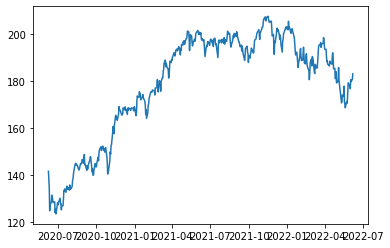

In [13]:
plt.plot(prices[prices['Symbol']=='VOX'].set_index('Date')['Adj Close'])

In [15]:
screener = pd.read_excel('SP1500_screener_multiple.xlsx',sheet_name="Screener")

In [20]:
screener.set_index('Symbol').loc['BA']

max_2y                         278.570007
min_2y                         117.080002
std_2y                          31.238273
mean_2y                         202.95362
max_1y                         252.300003
min_1y                         117.080002
std_1y                          29.866367
mean_1y                         202.58384
latest_p                       140.820007
2yr_close_0pct                 119.400002
2yr_close_2pct                 129.490799
2yr_close_9pct                 159.788394
2yr_close_25pct                178.630005
2yr_close_50pct                209.899994
2yr_close_75pct                224.460007
2yr_close_91pct                241.971204
2yr_close_98pct                254.729196
2yr_close_100pct               269.190002
1yr_close_0pct                 119.400002
1yr_close_2pct                    124.157
1yr_close_9pct                 148.886194
1yr_close_25pct                190.617504
1yr_close_50pct                211.475006
2yr_close_75pct.1              222

In [ ]:
fundamentals = pd.read_excel('SP1500_screener_multiple.xlsx',sheet_name="Stock_Fundamentals")
fundamentals.set_index(fundamentals.columns[0],inplace=True)


In [ ]:
stock_indexes = pd.read_excel('SP1500_screener_multiple.xlsx',sheet_name="SP1500")
stock_indexes.drop(stock_indexes.columns[0], axis=1, inplace=True)
stock_indexes.set_index(stock_indexes.columns[0],inplace=True)
stock_indexes

In [ ]:
spdr_indexes = pd.read_excel('SP1500_screener_multiple.xlsx',sheet_name="spdr_indexes")
#vanguard_sectors.drop(vanguard_sectors.columns[0], axis=1, inplace=True)
spdr_indexes.set_index(spdr_indexes.columns[0],inplace=True)
spdr_indexes.columns=['Symbol']
spdr_indexes

In [ ]:
vanguard_sectors = pd.read_excel('SP1500_screener_multiple.xlsx',sheet_name="vanguard_sectors")
#vanguard_sectors.drop(vanguard_sectors.columns[0], axis=1, inplace=True)
vanguard_sectors.set_index(vanguard_sectors.columns[0],inplace=True)
vanguard_sectors.columns=['Symbol']
vanguard_sectors

In [ ]:
#[*spdr_indexes['Symbol'],*vanguard_sectors['Symbol']]

In [ ]:
sector_performance_return = pd.DataFrame()

for v in [*spdr_indexes['Symbol'],*vanguard_sectors['Symbol']]:
    subset = prices[prices['Symbol'] == v]
    subset_ = subset.set_index('Date').asfreq('Q')[['Adj Close']].pct_change()
    subset_.index = subset_.index.values.astype('M8[D]')
    dt_str = subset_.index[-1].strftime('%Y-%m-%d')
    tail = subset[subset.set_index('Date').index>=dt_str]
    dt_str = subset.set_index('Date').index[-1].strftime('%Y-%m-%d')
    tail_ = pd.DataFrame([(tail.set_index('Date')['Adj Close'][-1]-tail.set_index('Date')['Adj Close'][0])/tail.set_index('Date')['Adj Close'][0]],index=[datetime.strptime(dt_str, '%Y-%m-%d')],columns=['Adj Close'])
    subset__ = pd.concat([subset_,tail_],axis=0)
    sector_performance_return = pd.concat([sector_performance_return,subset__],axis=1)

In [ ]:
sector_performance_return

In [ ]:
sector_performance_return.columns = [*[i for i in spdr_indexes.index],*[v for v in vanguard_sectors.index]]
sector_performance_return = sector_performance_return.T

In [ ]:
cm = sns.color_palette("blend:red,yellow,green", as_cmap=True)

sector_performance_return.style.background_gradient(cmap = cm,axis=1)

In [ ]:
sector_performance_return

In [ ]:
sector_performances = pd.DataFrame()
sector_performances_values = pd.DataFrame()
for c in sector_performance_return.columns:
    print(c)
    temp = pd.DataFrame(sector_performance_return[c].sort_values(ascending=False).index,columns=[c])
    temp2 = pd.DataFrame(sector_performance_return[c].sort_values(ascending=False),columns=[c])
    temp2.reset_index(drop=True,inplace=True)    
    sector_performances = pd.concat([sector_performances,temp],axis=1)
    sector_performances_values = pd.concat([sector_performances_values,temp2],axis=1)
    #print(sector_performance_return[c].sort_values(ascending=False))
sector_performances_values

In [ ]:
sector_performances = pd.DataFrame()
for c in sector_performance_return.columns:
    print(c)
    temp = pd.DataFrame(sector_performance_return[c].sort_values(ascending=False).index,columns=[c])
    sector_performances = pd.concat([sector_performances,temp],axis=1)
    #print(sector_performance_return[c].sort_values(ascending=False))

In [ ]:
import matplotlib as mp
cycles_ = ['Expansion','Slowdown','Recession','Recovery']
from IPython.display import display
from PIL import Image

path=r"C:\Users\User\Documents\wiki\wiki\dev\python\Python-Stock\reports\figures\Business cycles.png"
display(Image.open(path))

def b_g(s, cmap=cm, low=0, high=0):
    # Pass the columns from Dataframe A 
    a = A.loc[:,s.name].copy()
    #rng = a.max() - a.min()
    rng = np.nanmax(A.values.ravel()) - np.nanmin(A.values.ravel())
    norm = mp.colors.Normalize(np.nanmin(A.values.ravel()) - (rng * low),
                        np.nanmax(A.values.ravel()) + (rng * high))
    normed = norm(a.values)
    #c = [mp.colors.rgb2hex(x) for x in plt.cm.get_cmap(cmap)(normed)]
    c = [mp.colors.rgb2hex(x) for x in plt.cm.get_cmap(cm)(normed)]
    return ['background-color: %s' % color for color in c]

A = sector_performances_values
B = sector_performances
df = B.style.apply(b_g,cmap='RdYlGn')
#sector_performances.style.background_gradient(cmap = cm,axis=1,)
df


In [ ]:
sector_performance = []
for v in vanguard_sectors['Symbol']:
    sector_performance.append([v,screener[screener['Symbol']==v]['risk_trend_factor'].values[0]])
    #print([v,)
    

In [ ]:
temp_v = vanguard_sectors.reset_index()
temp_v.columns = ['Sector','Symbol']

In [ ]:
pd.DataFrame(sector_performance,columns=['Symbol','risk_trend_factor']).merge(temp_v, on='Symbol', how='left').sort_values(by='risk_trend_factor',ascending=False)


In [ ]:
for v in sector_performance_return.index:
    subset = pd.DataFrame(sector_performance_return.loc[v])
    subset.columns = ['Return']
    plt.plot(subset)
    plt.xticks(subset.index, rotation=45)
plt.legend(sector_performance_return.index,loc=2)    
plt.show()


In [ ]:
sector_performance_return.T.iloc[-1].sort_values(ascending=False).index

In [ ]:
sector_performance_return

In [ ]:
sector_performance_return.T[sector_performance_return.T.iloc[-1].sort_values(ascending=False).index].style.background_gradient(cmap = cm,axis=None)

In [ ]:
#qgrid.show_grid(sector_dataset_pivot)

In [ ]:
threshold = .9875

In [ ]:
screener_good = screener[screener['risk_trend_factor']!='missing']

risk_trend_threshold = screener_good['risk_trend_factor'].quantile(q=[threshold]).values[0]


In [ ]:
risk_trend_threshold

In [ ]:
temp = stock_sectors.reset_index()
temp.columns = ['Symbol','Sector']

In [ ]:
risk_screened = screener_good[screener_good['risk_trend_factor']>risk_trend_threshold]
risk_screened
#left join sector
risk_screened.merge(temp, on='Symbol', how='left')

In [ ]:
screener.columns

In [ ]:
"""
above_1yearSDev = screener_good[screener_good['latest_p']>screener['mean_1y']+screener_good['std_1y']]['Symbol'].values
above_2yearSDev = screener_good[screener_good['latest_p']>screener['mean_2y']+screener_good['std_2y']]['Symbol'].values
above_yearSDev = np.intersect1d(above_1yearSDev,above_2yearSDev)
"""

In [ ]:
#above_yearSDev

In [ ]:
"""
above_2year_t = screener[screener['pct_2yr']>threshold]['Symbol'].values
above_1year_t = screener[screener['pct_1yr']>threshold]['Symbol'].values
above_years_t = np.intersect1d(above_2year_t,above_1year_t)
"""

In [ ]:
#above_years_t

In [ ]:
#above_combined = np.intersect1d(above_yearSDev,above_years_t)

In [ ]:
#above_combined

In [ ]:
#screened_final_set = np.intersect1d(risk_screened,above_combined)

In [ ]:
screened_final_set = risk_screened.set_index('Symbol')
#screened_final_set

In [ ]:
#pivot_ui(prices, outfile_path='pivottablejs.html')
#HTML('pivottablejs.html')

In [ ]:
for s in np.setdiff1d(np.setdiff1d(screened_final_set.index,temp_v['Symbol'].values),spdr_indexes.iloc[:,0].values):
    print(s)
    subset=prices[prices['Symbol']==s]
    
    dates = []
    for t in subset['Date'].values:
        d = pd.Timestamp(t).strftime('%Y-%m-%d')
        dates.append(d)
        dto = datetime.strptime(d, '%Y-%m-%d').date()

    old_ordinal = [datetime.strptime(i, '%Y-%m-%d').toordinal() for i in dates]
    new_ordinal = old_ordinal + md.date2num(np.datetime64('0000-12-31'))
    x = new_ordinal
    y= subset['Adj Close']

    slope, intercept, r, p, std_err = stats.linregress(x, y)

    mymodel = list(map(myfunc, x))

    fig, ax = plt.subplots()
    
    plt.scatter(x, y)
    plt.scatter(x, subset['trailing_1yr_max'])
    plt.scatter(x, subset['trailing_1yr_min'])
    
    #plt.scatter(x, subset['supply_trend'])
    plt.scatter(x, subset['supply_trend_1yr'])
    print("supply trend:",screener.loc[np.where(screener.set_index('Symbol').index==s)[0][0]]['vol_30d_2yr'])
    print("Sector:", stock_sectors.iloc[np.where(np.array(stock_sectors.index)==s)[0][0]][0])
    print("Index:", stock_indexes.iloc[np.where(np.array(stock_indexes.index)==s)[0][0]][0])
    
    #print("Sector:",screener.loc[np.where(screener.set_index('Symbol').index==s)[0][0]]['Sector'])
    #print("Sector:",screener.loc[np.where(screener.set_index('Symbol').index==s)[0][0]]['vol_30d_2yr'])

    plt.plot(x, mymodel)
    
    l = matplotlib.dates.AutoDateLocator()
    f = matplotlib.dates.ConciseDateFormatter(l)    
    
    ax.set_xticklabels(ax.get_xticks(), rotation = 45)
    
    locator = matplotlib.dates.AutoDateLocator()
    formatter = matplotlib.dates.ConciseDateFormatter(locator)

    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    
    date_form = DateFormatter("%Y-%m-%d")
    ax.xaxis.set_major_formatter(date_form)
    plt.show()